In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import statsmodels.api as sm
from statsmodels.stats.multitest import fdrcorrection

In [2]:
total_len = np.arange(0,79)

In [3]:
file = pd.read_csv("MetadataHuman2021_554.csv")

In [4]:
meta = pd.read_csv("traits_buccal_used.csv")

In [5]:
meta = meta.set_index(total_len)

In [6]:
buccal = file[286:365]

In [7]:
buccal = buccal.set_index(total_len)

In [8]:
meta_cleaned = meta[~meta.isnull().any(axis=1)]

In [9]:
meta_cleaned = meta_cleaned.drop(columns=['prosperID', 'inaugural_barcode'], axis=1)

In [10]:
meta_cleaned

,height,weight,BMI,sleep_hours,sleep_from_optimal,happy_score,activity,smoke_cig,smoke_current,diet_alcohol_mg_kg,diet_alcohol_drinks,diet_fasting
0,68.5039,136.687,20.476322,8.17,0.166667,6.0,2.5,1.0,1.0,0.232253,5.0,10.00
1,73.0000,178.000,23.481704,7.50,0.500000,4.0,6.0,0.0,0.0,0.285358,8.0,11.00
2,67.7000,180.000,27.608990,8.00,0.000000,8.0,1.0,0.0,0.0,0.038480,1.0,10.25
4,78.0000,210.000,24.265286,8.00,0.000000,8.0,5.0,0.0,0.0,0.151172,5.0,11.00
5,66.0000,137.000,22.100000,7.80,0.200000,7.0,6.5,0.0,0.0,0.140000,3.0,13.75
...,...,...,...,...,...,...,...,...,...,...,...,...
74,67.7000,165.000,25.839830,7.50,0.500000,10.0,0.5,0.0,0.0,0.343200,2.0,10.50
75,73.0000,185.000,24.405142,9.00,1.000000,8.0,4.0,0.0,0.0,0.514801,15.0,13.50
76,68.0000,153.000,23.261029,8.00,0.000000,5.0,3.0,1.0,0.0,0.497977,12.0,12.00
77,62.0000,120.000,21.945890,7.75,0.250000,7.0,5.0,1.0,0.0,0.211640,4.0,13.00


In [11]:
buccal_cleaned = buccal[~meta.isnull().any(axis=1).to_numpy()]

In [12]:
buccal_cleaned

,sampleID,age,LARS predicted age,PLS predicted age,ElasticNet predicted age,Ridge predicted age,gender,predicted gender,imputed (predicted),weight(lbs),height(cm),BMI,race,smoker
0,P11111111111111,24.40,21.183,25.294,32.993,36.601,0.0,0.0,NaN,136.687,173.999906,20.476322,NaN,1.0
1,P11111111111112,21.80,23.241,25.914,23.602,25.315,1.0,1.0,NaN,178.000,185.420000,23.481704,NaN,0.0
2,P11111111111113,31.59,32.332,38.046,38.841,40.028,1.0,1.0,NaN,180.000,171.958000,27.608990,NaN,0.0
4,P41019061105624,57.40,52.284,52.742,58.478,60.528,1.0,1.0,NaN,210.000,198.120000,24.265286,NaN,0.0
5,P41019061105630,49.30,48.244,42.975,44.241,45.569,0.0,0.0,NaN,137.000,167.640000,22.100000,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,P41019091109813,32.79,40.475,37.241,34.828,35.561,1.0,1.0,NaN,165.000,171.958000,25.839830,NaN,0.0
75,P41019091109817,20.30,24.793,17.755,19.746,17.855,1.0,1.0,NaN,185.000,185.420000,24.405142,NaN,0.0
76,P41019091109831,51.60,45.297,39.549,47.650,47.807,0.0,0.0,NaN,153.000,172.720000,23.261029,NaN,0.0
77,P41019091109837,66.00,68.870,74.866,70.744,71.272,0.0,0.0,NaN,120.000,157.480000,21.945890,NaN,0.0


In [13]:
ages = buccal_cleaned['age']

In [14]:
predicted_ages = buccal_cleaned['LARS predicted age']

In [15]:
moderators = []
moderators_p = []
moderators_f = []
interactors = []
interactors_p = []
interactors_f = []

In [16]:
for column in meta_cleaned:
    moderation = meta_cleaned[column]
    interaction = meta_cleaned[column] * ages
    stack = np.stack((ages, moderation, interaction), axis = 1)
    model = sm.OLS(predicted_ages, stack)
    fit = model.fit()
    moderators.append(fit.params[1])
    moderators_fdr = fdrcorrection(fit.pvalues[1])
    moderators_f.append(moderators_fdr[1][0])
    moderators_p.append(fit.pvalues[1])
    interactors.append(fit.params[2])
    interactors_fdr = fdrcorrection(fit.pvalues[2])
    interactors_p.append(fit.pvalues[2])
    interactors_f.append(interactors_fdr[1][0])

In [17]:
moderators_p

[0.00157841335511152,
 0.0009171405471519967,
 0.00031948421595295553,
 0.0046747342789662276,
 0.19169851733637208,
 0.0011426689484003662,
 0.005847812555771104,
 0.397600481257788,
 0.7602077331500342,
 0.0028339279088476217,
 0.011997355324341128,
 0.003949313603111493]

In [18]:
interactors_pstars = []
interactors_count = 0
for interactor in interactors_p:
    if interactor > 0.05:
        interactors_pstars.append(' ')
    elif (interactor <= 0.05) & (interactor > 0.01):
        interactors_pstars.append('*')
    elif (interactor <= 0.01) & (interactor > 0.005):
        interactors_pstars.append('**')
    else:
        interactors_pstars.append('***')
        
    interactors_count += 1
    
moderators_pstars = []
moderators_count = 0
for moderator in moderators_p:
    if moderator > 0.05:
        moderators_pstars.append(' ')
    elif (interactor <= 0.05) & (interactor > 0.01):
        moderators_pstars.append('*')
    elif (interactor <= 0.01) & (interactor > 0.005):
        moderators_pstars.append('**')
    else:
        moderators_pstars.append('***')
        
    moderators_count += 1

In [20]:
interactors_pstars = np.array(interactors_pstars)
moderators_pstars = np.array(moderators_pstars)
labelnames = ['Height','Weight', 'BMI', 'Sleep Hours', 'Sleep from Optimal', 'Happy Score', 'Activity', 'Smoke', 'Smoke current', 'Alcohol (mg/kg)', 'Alcohol (drinks)', 'Fasting']

In [21]:
interactors_log = np.log10(interactors_p) * np.full(len(interactors_p), -1)
moderators_log = np.log10(moderators_p) * np.full(len(interactors_p), -1)

In [22]:
zipped_mix = zip(moderators_log, interactors_log, labelnames)
sorted_mix = sorted(zipped_mix, reverse=True)
X_mix = [label for mod, inter, label in sorted_mix]
mod_mix = [mod for mod, inter, label in sorted_mix]
inter_mix = [inter for mod, inter, label in sorted_mix]

In [23]:
# figbuc, axbuc = plt.subplots()
# index = np.arange(len(moderators))
# bar_width = 0.35
# opacity = 0.8

# buc1 = plt.bar(index, moderators_log, bar_width,
# alpha=opacity,
# color='b',
# label='Moderator')

# buc2 = plt.bar(index + bar_width, interactors_log, bar_width,
# alpha=opacity,
# color='g',
# label='Moderator * Age')

# axbuc.set_ylabel('-log(p)')
# axbuc.set_title('Buccal Moderators')
# axbuc.set_xticks(index + 0.35/2)

# axbuc.legend()

# axbuc.bar_label(buc1, labels = moderators_pstars)
# axbuc.bar_label(buc2, labels = interactors_pstars)

# # figbuc.savefig('Buccal Moderators.png', dpi=300)

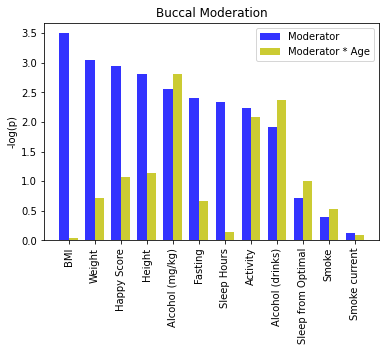

In [25]:
figbuc, axbuc = plt.subplots()
index = np.arange(len(moderators))
bar_width = 0.35
opacity = 0.8

buc1 = plt.bar(index, mod_mix, bar_width,
alpha=opacity,
color='b',
label='Moderator')

buc2 = plt.bar(index + bar_width, inter_mix, bar_width,
alpha=opacity,
color='y',
label='Moderator * Age')

axbuc.set_ylabel('-log(p)')
axbuc.set_title('Buccal Moderation')
axbuc.set_xticks(index + 0.35/2)
axbuc.set_xticklabels(X_mix, rotation=90)

axbuc.legend()

# axbuc.bar_label(buc1)
# axbuc.bar_label(buc1, labels = interactors_pstars)
# axbuc.bar_label(buc2, labels = interactors_pstars)

# figbuc.savefig('Buccal Moderators.png', dpi=300)